# Car Price Prediction from Car Dekho

## Table of Contents
1. **[Data Preprocessing](#one)**
2. **[Null Value Imputation](#two)**
3. **[EDA](#three)**
4. **[Base Model](#four)**
5. **[Testing Assumptions of Linear Regression](#five)**
6. **[Final Models](#six)**

In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# for pandas profiling
import pandas_profiling as pp

In [2]:
dataset = pd.read_csv('data/Car details v3.csv')
dataset.head(5)

name  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   Third Owner   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700(kgm@ rpm)    5.0  
3  22.4 kgm at 1750-2750rpm    5.0  
4     11.5@ 4,500(kgm@ rpm)    5.0

In [3]:
dataset.shape

(8128, 13)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
dataset.describe()

year  selling_price     km_driven        seats
count  8128.000000   8.128000e+03  8.128000e+03  7907.000000
mean   2013.804011   6.382718e+05  6.981951e+04     5.416719
std       4.044249   8.062534e+05  5.655055e+04     0.959588
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.800000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [6]:
profile = pp.ProfileReport(dataset)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.34s/it]


<a id='one'></a>
# Data Preprocessing

In [7]:
dataset.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
# Cleaning Mileage column

# filling nulls with zero values
dataset['mileage'] = dataset['mileage'].fillna('0 kmpl')

# splitting numeric data
mileage=[]
for i in dataset['mileage'].str.split(' '):
    mileage.append(float(i[0]))

# storing the numeric data
dataset['mileage'] = mileage

# restoring the nulls in the data
dataset['mileage'] = dataset['mileage'].replace({0:np.nan})

# sanity check 
dataset['mileage']

0       23.40
1       21.14
2       17.70
3       23.00
4       16.10
        ...  
8123    18.50
8124    16.80
8125    19.30
8126    23.57
8127    23.57
Name: mileage, Length: 8128, dtype: float64

In [9]:
# Cleaning Engine column

# filling nulls with zero values
dataset['engine'] = dataset['engine'].fillna('0 CC')

# splitting numeric data
engine=[]
for i in dataset['engine'].str.split(' '):
    engine.append(int(i[0]))

# storing the numeric data
dataset['engine'] = engine

# restoring the nulls in the data
dataset['engine'] = dataset['engine'].replace({0:np.nan})

# sanity check 
dataset['engine']

0       1248.0
1       1498.0
2       1497.0
3       1396.0
4       1298.0
         ...  
8123    1197.0
8124    1493.0
8125    1248.0
8126    1396.0
8127    1396.0
Name: engine, Length: 8128, dtype: float64

In [10]:
# Cleaning max_power column

# filling nulls with zero values
dataset['max_power'] = dataset['max_power'].replace({'0':'0 bhp',' bhp':'0 bhp',np.nan:'0 bhp'})

# splitting numeric data
power=[]
for i in dataset['max_power'].str.split(' '):
    power.append(float(i[0]))

# storing the numeric data
dataset['max_power'] = power

# restoring the nulls in the data
dataset['max_power'] = dataset['max_power'].replace({0:np.nan})

# sanity check 
dataset['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8128, dtype: float64

In [11]:
# creating a new columns with only car brand and model name
dataset['car'] = [' '.join(i[:2]) for i in dataset['name'].str.split(' ')]

# sanity check
dataset['car']

0        Maruti Swift
1         Skoda Rapid
2          Honda City
3         Hyundai i20
4        Maruti Swift
            ...      
8123      Hyundai i20
8124    Hyundai Verna
8125     Maruti Swift
8126      Tata Indigo
8127      Tata Indigo
Name: car, Length: 8128, dtype: object

In [12]:
# Dropping torque column 
dataset.drop(columns=['torque'],inplace=True)
dataset.drop(columns=['name'],inplace=True)

In [13]:
dataset.isnull().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          238
engine           221
max_power        222
seats            221
car                0
dtype: int64

<a id='two'></a>
# Null Value Imputation

In [14]:
null_cars = dataset.groupby('car').mean()['mileage'].sort_values().tail(11).index

In [15]:
x = pd.DataFrame()
for i in null_cars:
    x=pd.concat([x,dataset[dataset['car']==i]],axis=0)

In [16]:
dataset = dataset.drop(index=[31, 5005, 7538, 1347, 1216, 1432, 1815, 2867, 3922, 5385, 5451,
             316,  535, 1933, 6516, 7275, 7528, 7337, 6730, 3310, 2959, 3456]).reset_index(drop=True)

In [17]:
# directly filling these columns with the respective means in there by the grouping of car
dataset[['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats']]=dataset.groupby("car").transform(lambda x: x.fillna(x.mean()))

In [18]:
# sanity check
dataset.isnull().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
car              0
dtype: int64

<a id='three'></a>
# EDA

In [19]:
dataset.dtypes

year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
car               object
dtype: object

In [20]:
# Converting seats to categorical column
dataset['seats'] = dataset['seats'].astype('O')

In [21]:
# Creating a new column Age from Year
dataset['Age'] = 2021 - dataset['year']

In [22]:
# dropping years col
dataset.drop(columns=['year'],inplace=True)

In [23]:
# Separating numerical and categorical columns
df_int = dataset.select_dtypes(include=np.number)
df_cat = dataset.select_dtypes(include='O')

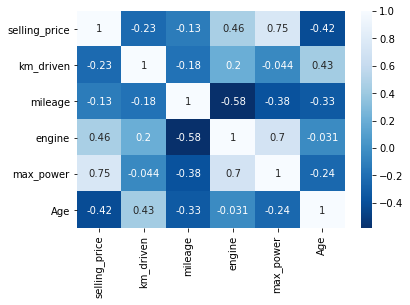

In [24]:
# Correlation matrix
sns.heatmap(df_int.corr(),annot=True,cmap=plt.cm.Blues_r)
plt.show()

## Age and Selling price is neagtively coreleated
## selling_price and max_power is strongly positive coreleated
## max_power and engine is positivley corelated
## age and km _driven are positve corelated

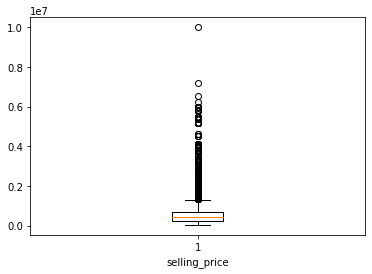

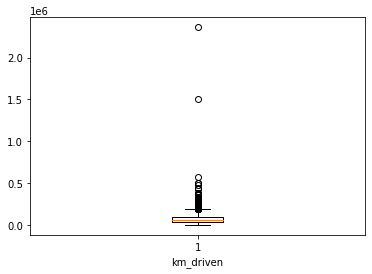

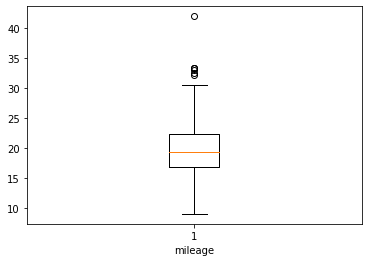

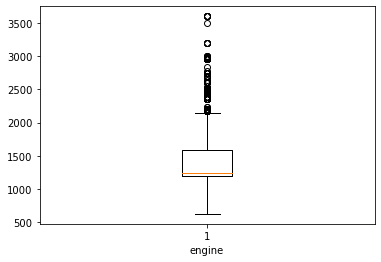

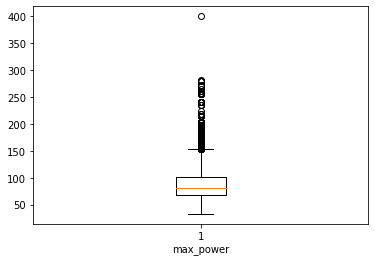

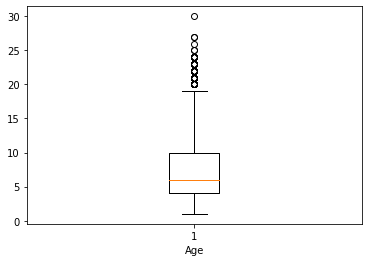

In [25]:
for i in df_int.columns:
    plt.boxplot(df_int[i])
    plt.xlabel(i)
    plt.show()

In [26]:
df_int.describe().loc['mean']

selling_price    638887.892055
km_driven         69839.254133
mileage              19.450891
engine             1454.372268
max_power            91.076373
Age                   7.167407
Name: mean, dtype: float64

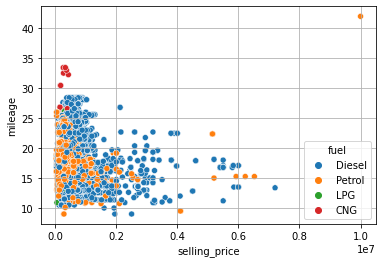

In [27]:
sns.scatterplot(data = dataset,x = 'selling_price',y= 'mileage',hue = 'fuel')  # 
plt.grid()
plt.show()

### CNG cars are most fuel efficient and cost effective.
### Mileage for petrol and diesel car is within the range of 10-30 Kmpl

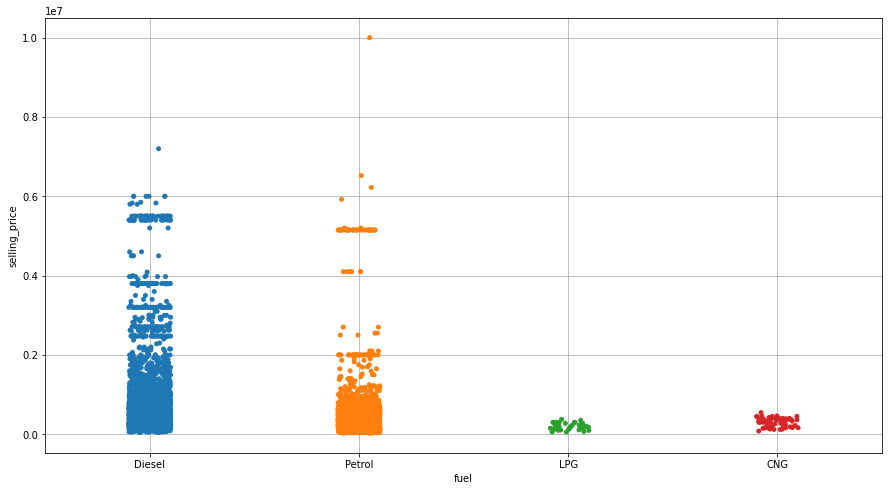

In [28]:
plt.figure(figsize=(15,8))
sns.stripplot(y=dataset['selling_price'],x=dataset['fuel'])
plt.grid()
plt.show()

### Petrol cars are comparitively cheaaper in comparison to Diesel cars(under Rs. 2 lakhs) 
### High Concentration of Petrol Cars in the selling price range : 0-2 lakhs
### High Concentration of Diesel Cars in the selling price range : 0-6 lakhs

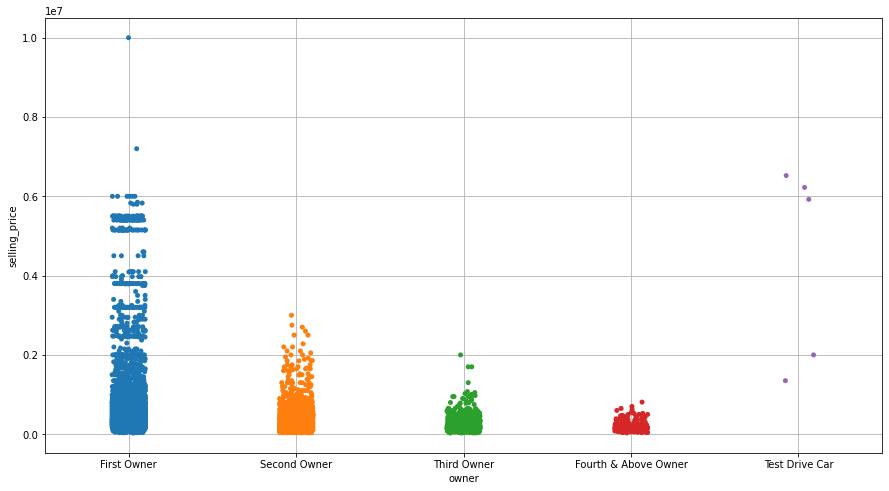

In [29]:
plt.figure(figsize=(15,8))
sns.stripplot(y=dataset['selling_price'],x=dataset['owner'])
plt.grid()
plt.show()

## It is clearly visible that selling price is decreasing as the pre owner no increases.

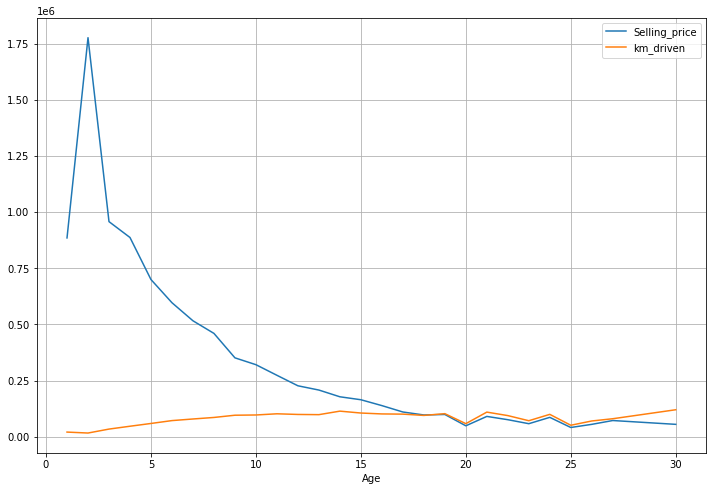

In [30]:
plt.figure(figsize=(12,8))
df_int.groupby(['Age']).mean()['selling_price'].plot(kind='line',grid=True,label='Selling_price')
df_int.groupby(['Age']).mean()['km_driven'].plot(kind='line',grid=True)
plt.legend()
plt.show()

### As age increases selling price decreases and Kms driven increases

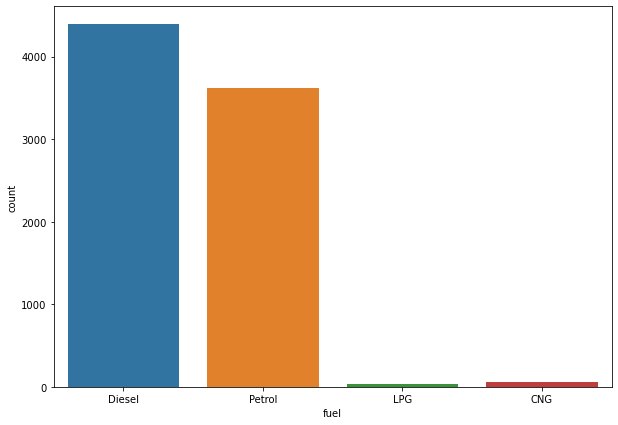

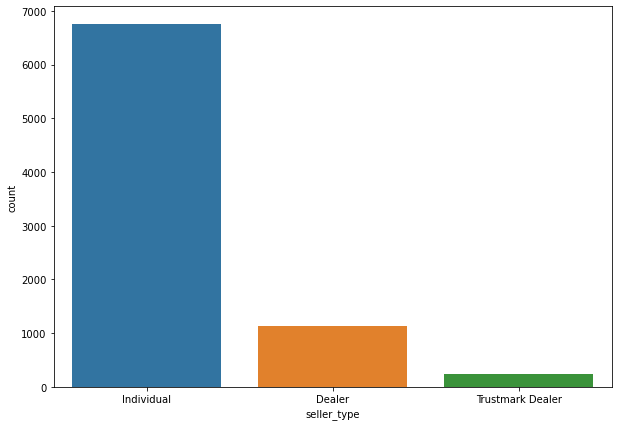

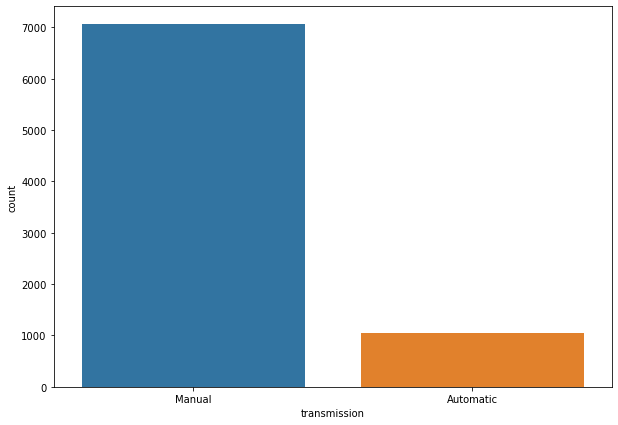

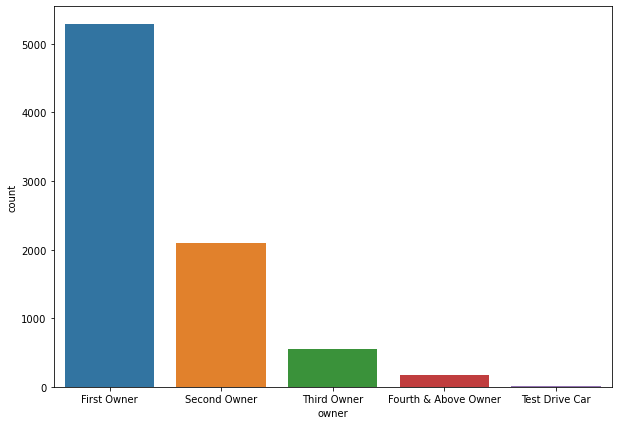

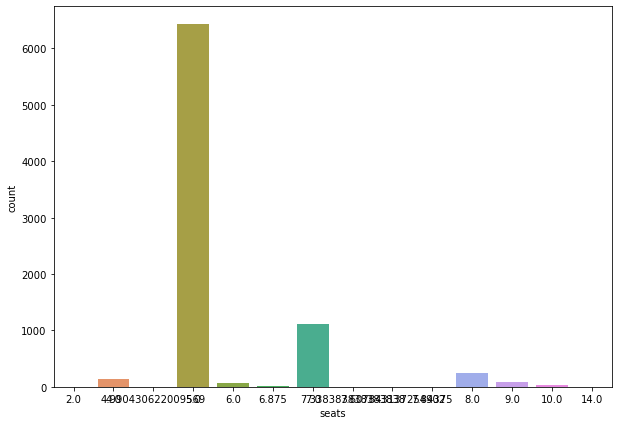

In [31]:
from warnings import filterwarnings
filterwarnings('ignore')
for i in df_cat.iloc[:,:-1]:
    plt.figure(figsize=(10,7))
    sns.countplot(df_cat[i])
    plt.show()

### Diesel cars are more in our dataset as compared to other fuel types.
### Individual seller type is in  majority in seller type.
### Maximum cars in our dataset is haivng seating capacity of 5.
### Manual cars are more as compared to automatic cars 

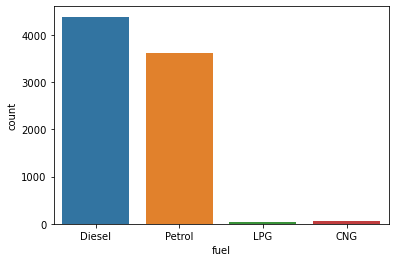

In [32]:
sns.countplot(data = dataset,x='fuel')
plt.show()

In [33]:
dataset['seats']=dataset['seats'].map(lambda x: round(x))

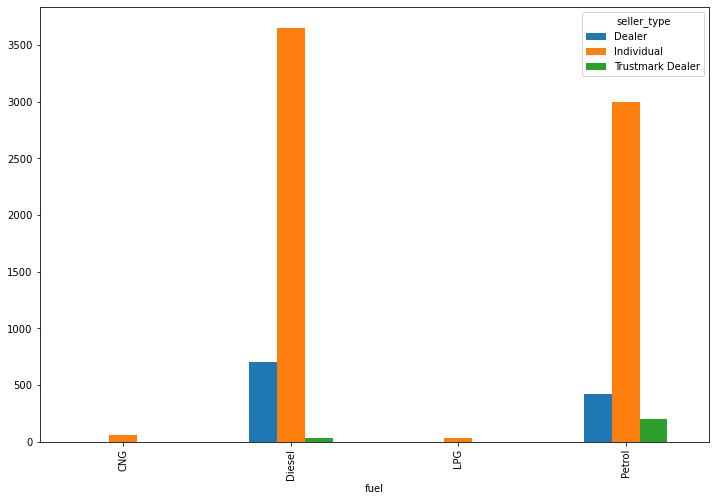

In [34]:
pd.crosstab(dataset['fuel'],dataset['seller_type']).plot(kind='bar',figsize=(12,8))
plt.show()

### No Trustmark ,dealer seller types in LPG and CNG fuel type.

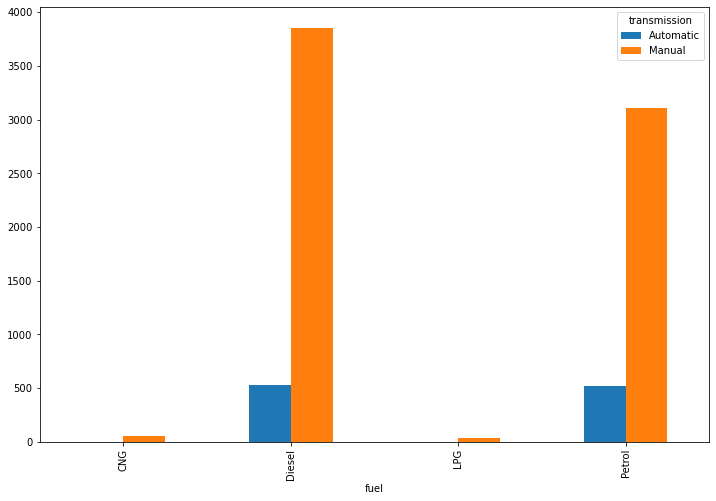

In [35]:
pd.crosstab(dataset['fuel'],dataset['transmission']).plot(kind='bar',figsize=(12,8))
plt.show()

### No automatic tranmission in LPG and CNG duel type
### Manual transmission is predominant in both Diesel and Petrol cars

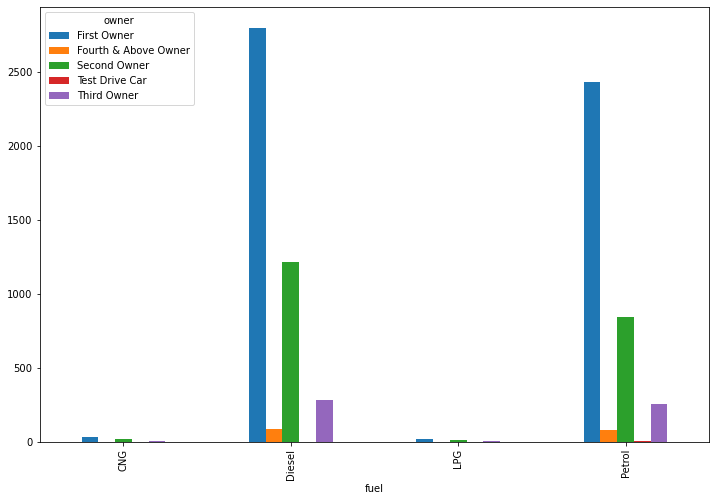

In [36]:
pd.crosstab(dataset['fuel'],dataset['owner']).plot(kind='bar',figsize=(12,8))
plt.show()

## Test drive cars are available only in petrol fuel type
## First Owner cars is predominant in both Diesel and Petrol fuel type

<a id='four'></a>
# Base Model

### Label Encoding the categorical variables

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_cat = pd.DataFrame()

for i in df_cat.columns:
    label_cat[i] = le.fit_transform(df_cat[i])

In [38]:
X_base = pd.concat([label_cat,df_int],axis=1)
X_base

fuel  seller_type  transmission  owner  seats  car  selling_price  \
0        1            1             1      0      3  120         450000   
1        1            1             1      2      3  154         370000   
2        3            1             1      4      3   55         158000   
3        1            1             1      0      3   75         225000   
4        3            1             1      0      3  120         130000   
...    ...          ...           ...    ...    ...  ...            ...   
8101     3            1             1      0      3   75         320000   
8102     1            1             1      1      3   72         135000   
8103     1            1             1      0      3  120         382000   
8104     1            1             1      0      3  162         290000   
8105     1            1             1      0      3  162         290000   

      km_driven  mileage  engine  max_power  Age  
0        145500    23.40  1248.0      74.00    7  
1        120000    21.14  1498.0     103.52    7  
2        140000    17.70  1497.0      78.00   15  
3        127000    23.00  1396.0      90.00   11  
4        120000    16.10  1298.0      88.20   14  
...         ...      ...     ...        ...  ...  
8101     110000    18.50  1197.0      82.85    8  
8102     119000    16.80  1493.0     110.00   14  
8103     120000    19.30  1248.0      73.90   12  
8104      25000    23.57  1396.0      70.00    8  
8105      25000    23.57  1396.0      70.00    8  

[8106 rows x 12 columns]

In [39]:
y = X_base['selling_price'].values

In [40]:
X_base.drop(columns=['selling_price'],inplace=True)

### train test split

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_base,y,random_state=8)

### Linear Regression 

In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [43]:
lr.fit(X_train,y_train)

LinearRegression()

In [44]:
lr.score(X_train,y_train)

0.6823443600613711

In [45]:
lr.score(X_test, y_test)

0.6644841275556826

In [46]:
import statsmodels.api as sm
model = sm.OLS(y_train,sm.add_constant(X_train)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1185.
Date:                Tue, 20 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:32:40   Log-Likelihood:                -87855.
No. Observations:                6079   AIC:                         1.757e+05
Df Residuals:                    6067   BIC:                         1.758e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.399e+05   1.01e+05      1.389   

In [47]:
residual = model.resid

<a id='five'></a>
# Testing Assumptions of Linear Regression

## Test for Normality

In [48]:
# Ho: Predictor variable is Normal
# H1: Predictor variable is not Normal

from scipy.stats import jarque_bera
jarque_bera(residual)

Jarque_beraResult(statistic=49938.91561736401, pvalue=0.0)

### As our p-value is less than 0.05, we reject our null hypothesis that our data is normal

## Test for Linearity/ Homoscedasticity/ Autocorrelation

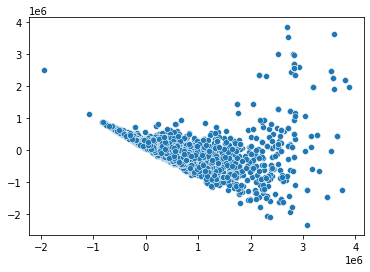

In [49]:

fitted = model.fittedvalues

sns.scatterplot(fitted,residual)
plt.show()

### As we can see that our data is non-linear, hence we can say that the data is non linear
### As the residuals are highly varying, they are Heteroscedastic
### As we observe no pattern in the residuals, we can say that there is no autocorrealation present in the data

## Test for Multicollinearity

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X_base.columns

vif_data["VIF"] = [variance_inflation_factor(X_base.values, i)
                          for i in range(len(X_base.columns))]
  
print(vif_data)

         feature        VIF
0           fuel   5.000426
1    seller_type   6.831443
2   transmission  11.510250
3          owner   1.901692
4          seats  10.128328
5            car   6.473541
6      km_driven   3.623124
7        mileage  15.951442
8         engine  40.280221
9      max_power  22.759468
10           Age   6.744922


<a id='six'></a>
# Final Models

In [51]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
dtr.score(X_train,y_train)

0.9996683658883604

In [53]:
dtr.score(X_test,y_test)

0.9420700036310415

In [54]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [55]:
rfr.score(X_train,y_train)

0.9955612853919522

In [56]:
rfr.score(X_test,y_test)

0.95401583958492

In [61]:
y_pred = rfr.predict(X_test)

In [63]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred))

169437.01846191715

In [57]:
# installing xgboost
!pip3 install xgboost

In [58]:
# XGBoost Regressor
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', 
                          colsample_bytree = 0.3, 
                          learning_rate = 0.1, 
                          max_depth = 10, 
                          alpha = 1, 
                          n_estimators = 250)
xgb_reg.fit(X_train,y_train)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=10,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=250, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
xgb_reg.score(X_train,y_train)

0.9974518821156302

In [60]:
xgb_reg.score(X_test,y_test)

0.9476996667548025

In [65]:
y_pred_x = xgb_reg.predict(X_test)
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred_x))

180699.26995681366

# Therefore the best model for this data is Random Forest Regressor